# Chapter: Decision Trees and Ensemble Learning


# Topic: Soft Sensing via PLS in Concrete Construction Industry

In [2]:
# import
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# read data
data = np.loadtxt('cement_strength.txt', delimiter=',', skiprows=1)
X = data[:,0:-1]
y = data[:,-1][:,None]

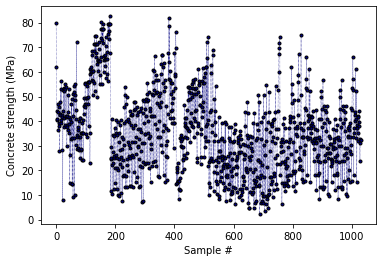

In [3]:
# plot raw output data
plt.figure()
plt.plot(y, color='navy', linestyle = ':', marker='.', linewidth=0.5, markeredgecolor = 'k')
plt.xlabel('Sample #')
plt.ylabel('Concrete strength (MPa)')
plt.show()

In [4]:
# separate training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 100)

In [5]:
# scale data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler()
X_train_normal = X_scaler.fit_transform(X_train)
X_test_normal = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train_normal = y_scaler.fit_transform(y_train)
y_test_normal = y_scaler.transform(y_test)

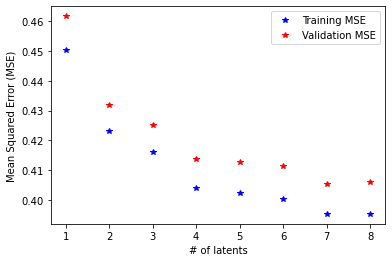

In [6]:
# Find # latents using kFold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

scaler = StandardScaler()

fit_MSE = []
validate_MSE = []
for n_comp in range(1,9):
    local_fit_MSE = []
    local_validate_MSE = []
    
    kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)
    for fit_index, validate_index in kfold.split(y_train):
        X_fit_normal = scaler.fit_transform(X_train[fit_index])
        X_validate_normal = scaler.transform(X_train[validate_index])
        
        y_fit_normal = scaler.fit_transform(y_train[fit_index])
        y_validate_normal = scaler.transform(y_train[validate_index])
        
        pls = PLSRegression(n_components = n_comp)
        pls.fit(X_fit_normal, y_fit_normal)
        
        local_fit_MSE.append(mean_squared_error(y_fit_normal, pls.predict(X_fit_normal)))
        local_validate_MSE.append(mean_squared_error(y_validate_normal, 
                                                        pls.predict(X_validate_normal)))
    
    fit_MSE.append(np.mean(local_fit_MSE))
    validate_MSE.append(np.mean(local_validate_MSE))


# plot
plt.figure()
plt.plot(range(1,9), fit_MSE, 'b*', label = 'Training MSE')
plt.plot(range(1,9), validate_MSE, 'r*', label = 'Validation MSE')
plt.xticks(range(1,9))
plt.ylabel('Mean Squared Error (MSE)')
plt.xlabel('# of latents')
plt.legend()
plt.show()

In [7]:
# fit PLS model
pls = PLSRegression(n_components = 7)
pls.fit(X_train_normal, y_train_normal)

PLSRegression(n_components=7)

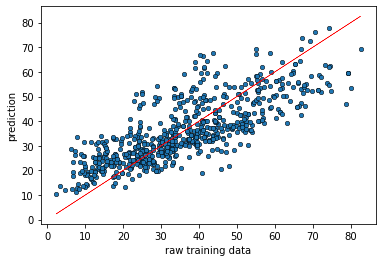

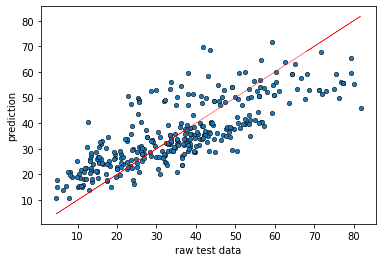

In [8]:
# predict and plot
y_train_normal_predicted = pls.predict(X_train_normal)
y_test_normal_predicted = pls.predict(X_test_normal)

y_train_predicted = y_scaler.inverse_transform(y_train_normal_predicted)
y_test_predicted = y_scaler.inverse_transform(y_test_normal_predicted)

plt.figure()
plt.plot(y_train, y_train_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_train, y_train, '-r', linewidth=0.5)
plt.xlabel('raw training data')
plt.ylabel('prediction')

plt.figure()
plt.plot(y_test, y_test_predicted, '.', markeredgecolor='k', markeredgewidth=0.5, ms=9)
plt.plot(y_test, y_test, '-r', linewidth=0.5)
plt.xlabel('raw test data')
plt.ylabel('prediction')
plt.show()

In [9]:
# check training vs test accuracy
from sklearn.metrics import r2_score
print('Accuracy over training data: ', r2_score(y_train, y_train_predicted))
print('Accuracy over test data: ', r2_score(y_test, y_test_predicted))

Accuracy over training data:  0.6044805754688263
Accuracy over test data:  0.6289477878856564
